<a href="https://colab.research.google.com/github/Shirshchauhan/refactored-bassoon/blob/main/weatherforecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In Data Science, weather forecasting is an application of Time Series Forecasting where we use time-series data and algorithms to make forecasts for a given time. If you want to learn how to forecast the weather using your Data Science skills, this article is for you. In this article, I will take you through the task of weather forecasting using Python.

Weather Forecasting
Weather forecasting is the task of forecasting weather conditions for a given location and time. With the use of weather data and algorithms, it is possible to predict weather conditions for the next n number of days.

For forecasting weather using Python, we need a dataset containing historical weather data based on a particular location. I found a dataset on Kaggle based on the Daily weather data of New Delhi. We can use this dataset for the task of weather forecasting. 

Analyzing Weather Data using Python
Now let’s start this task by importing the necessary Python libraries and the dataset we need:

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [19]:
data= pd.read_csv("https://raw.githubusercontent.com/RamyaGunam/Delhi_Climate_Data_Analysis/main/DailyDelhiClimateTest.csv")
print(data.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2017-01-01  15.913043  85.869565    2.743478     59.000000
1  2017-01-02  18.500000  77.222222    2.894444   1018.277778
2  2017-01-03  17.111111  81.888889    4.016667   1018.333333
3  2017-01-04  18.700000  70.050000    4.545000   1015.700000
4  2017-01-05  18.388889  74.944444    3.300000   1014.333333


In [3]:
print(data.describe())

         meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    21.713079   56.258362    8.143924   1004.035090
std      6.360072   19.068083    3.588049     89.474692
min     11.000000   17.750000    1.387500     59.000000
25%     16.437198   39.625000    5.563542   1007.437500
50%     19.875000   57.750000    8.069444   1012.739316
75%     27.705357   71.902778   10.068750   1016.739583
max     34.500000   95.833333   19.314286   1022.809524


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB
None


The date column in this dataset is not having a datetime data type. We will change it when required. Let’s have a look at the mean temperature in Delhi over the years:

In [5]:
figure = px.line(data, x="date", y = "meantemp",title="mean temperature in delhi over the years" )
figure.show()

Now let’s have a look at the humidity in Delhi over the years:

In [9]:
figure = px.line(data,x="date",y="humidity",title = "humidity in delhi over the years")
figure.show()
                 

Now let’s have a look at the wind speed in Delhi over the years:

In [12]:
figure = px.line(data, x="date",
                 y="wind_speed",
                 title='wind speed in delhi over the years')
figure.show()

Till 2017, the wind speed was higher during monsoons (August & September) and retreating monsoons (December & January). After 2017, there were no anomalies in wind speed during monsoons. Now let’s have a look at the relationship between temperature and humidity:

In [13]:
figure = px.scatter(data_frame = data, x="humidity",
                    y="meantemp", size="meantemp", 
                    trendline="ols", 
                    title = "Relationship Between Temperature and Humidity")
figure.show()

Analyzing Temperature Change
Now let’s analyze the temperature change in Delhi over the years. For this task, I will first convert the data type of the date column into datetime. Then I will add two new columns in the dataset for year and month values.

Here’s how we can change the data type and extract year and month data from the date column:

In [14]:
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d')
data['year'] = data['date'].dt.year
data["month"] = data["date"].dt.month
print(data.head())

        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2017-01-01  15.913043  85.869565    2.743478     59.000000  2017      1
1 2017-01-02  18.500000  77.222222    2.894444   1018.277778  2017      1
2 2017-01-03  17.111111  81.888889    4.016667   1018.333333  2017      1
3 2017-01-04  18.700000  70.050000    4.545000   1015.700000  2017      1
4 2017-01-05  18.388889  74.944444    3.300000   1014.333333  2017      1


Now let’s have a look at the temperature change in Delhi over the years:

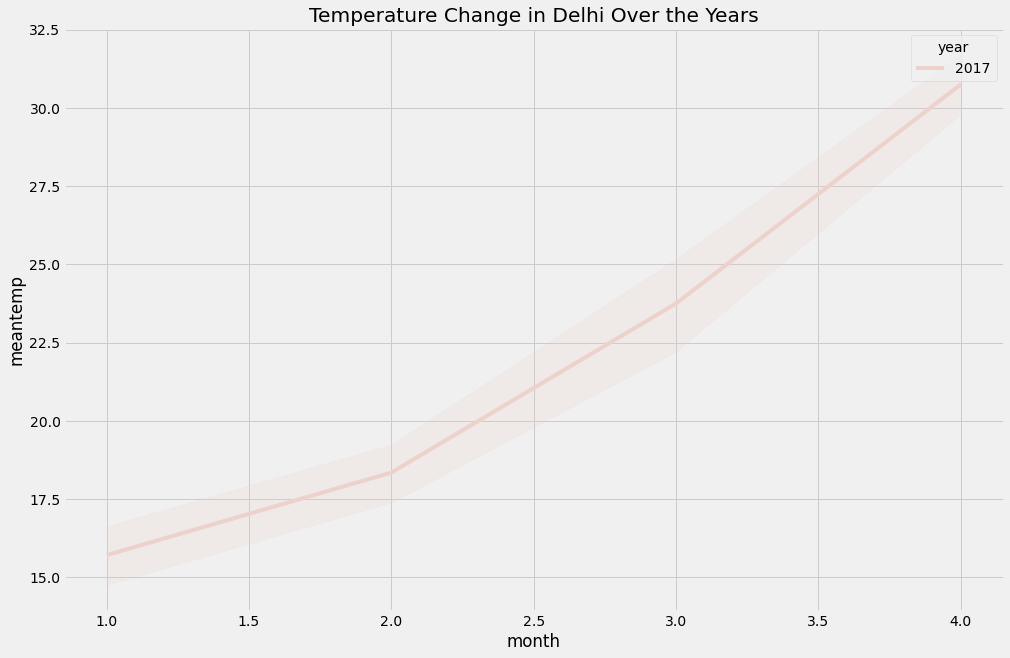

In [15]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temperature Change in Delhi Over the Years")
sns.lineplot(data = data, x='month', y='meantemp', hue='year')
plt.show()

Forecasting Weather using Python
Now let’s move to the task of weather forecasting. I will be using the Facebook prophet model for this task. The Facebook prophet model is one of the best techniques for time series forecasting. If you have never used this model before, you can install it on your system by using the command mentioned below in your command prompt or terminal:

pip install prophet
The prophet model accepts time data named as “ds”, and labels as “y”. So let’s convert the data into this format:

In [16]:
forecast_data = data.rename(columns = {"date": "ds", 
                                       "meantemp": "y"})
print(forecast_data)

            ds          y   humidity  wind_speed  meanpressure  year  month
0   2017-01-01  15.913043  85.869565    2.743478     59.000000  2017      1
1   2017-01-02  18.500000  77.222222    2.894444   1018.277778  2017      1
2   2017-01-03  17.111111  81.888889    4.016667   1018.333333  2017      1
3   2017-01-04  18.700000  70.050000    4.545000   1015.700000  2017      1
4   2017-01-05  18.388889  74.944444    3.300000   1014.333333  2017      1
..         ...        ...        ...         ...           ...   ...    ...
109 2017-04-20  34.500000  27.500000    5.562500    998.625000  2017      4
110 2017-04-21  34.250000  39.375000    6.962500    999.875000  2017      4
111 2017-04-22  32.900000  40.900000    8.890000   1001.600000  2017      4
112 2017-04-23  32.875000  27.500000    9.962500   1002.125000  2017      4
113 2017-04-24  32.000000  27.142857   12.157143   1004.142857  2017      4

[114 rows x 7 columns]


Now below is how we can use the Facebook prophet model for weather forecasting using Python:


In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

Summary
Weather forecasting is the task of forecasting weather conditions for a given location and time. With the use of weather data and algorithms, it is possible to predict weather conditions for the next n number of days. I hope you liked this article on Weather Analysis and Forecasting using Python.